In [7]:
import pandas as pd

In [8]:
populationData = pd.read_csv("sc-est2019-alldata6.csv")

In [9]:
population_df = pd.DataFrame(populationData)
population_df.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,SEX,ORIGIN,RACE,AGE,CENSUS2010POP,...,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,40,3,6,1,Alabama,0,0,1,0,37991,...,37818,38678,37824,36812,37575,37698,37629,37526,36370,35594
1,40,3,6,1,Alabama,0,0,1,1,38150,...,38036,37719,38597,37854,36968,37882,37732,37904,37641,36679
2,40,3,6,1,Alabama,0,0,1,2,39738,...,39570,38202,37653,38528,37769,37123,38048,37975,38172,37904
3,40,3,6,1,Alabama,0,0,1,3,39827,...,39805,39690,38113,37716,38605,37896,37266,38170,38197,38510
4,40,3,6,1,Alabama,0,0,1,4,39353,...,39493,39872,39628,38122,37751,38625,37954,37322,38312,38476


In [10]:
population_df.columns = population_df.columns.str.lower()
population_df.head()

,sumlev,region,division,state,name,sex,origin,race,age,census2010pop,...,popestimate2010,popestimate2011,popestimate2012,popestimate2013,popestimate2014,popestimate2015,popestimate2016,popestimate2017,popestimate2018,popestimate2019
0,40,3,6,1,Alabama,0,0,1,0,37991,...,37818,38678,37824,36812,37575,37698,37629,37526,36370,35594
1,40,3,6,1,Alabama,0,0,1,1,38150,...,38036,37719,38597,37854,36968,37882,37732,37904,37641,36679
2,40,3,6,1,Alabama,0,0,1,2,39738,...,39570,38202,37653,38528,37769,37123,38048,37975,38172,37904
3,40,3,6,1,Alabama,0,0,1,3,39827,...,39805,39690,38113,37716,38605,37896,37266,38170,38197,38510
4,40,3,6,1,Alabama,0,0,1,4,39353,...,39493,39872,39628,38122,37751,38625,37954,37322,38312,38476


In [11]:
# changing sex keys to s1=total, s2=male, s3= females
population_df.sex = population_df.sex.replace([0,1,2], ["s1","s2","s3"])
population_df.head()

,sumlev,region,division,state,name,sex,origin,race,age,census2010pop,...,popestimate2010,popestimate2011,popestimate2012,popestimate2013,popestimate2014,popestimate2015,popestimate2016,popestimate2017,popestimate2018,popestimate2019
0,40,3,6,1,Alabama,s1,0,1,0,37991,...,37818,38678,37824,36812,37575,37698,37629,37526,36370,35594
1,40,3,6,1,Alabama,s1,0,1,1,38150,...,38036,37719,38597,37854,36968,37882,37732,37904,37641,36679
2,40,3,6,1,Alabama,s1,0,1,2,39738,...,39570,38202,37653,38528,37769,37123,38048,37975,38172,37904
3,40,3,6,1,Alabama,s1,0,1,3,39827,...,39805,39690,38113,37716,38605,37896,37266,38170,38197,38510
4,40,3,6,1,Alabama,s1,0,1,4,39353,...,39493,39872,39628,38122,37751,38625,37954,37322,38312,38476


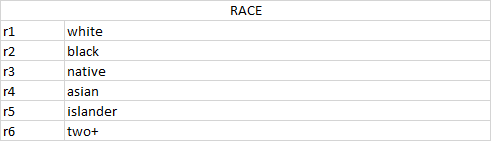

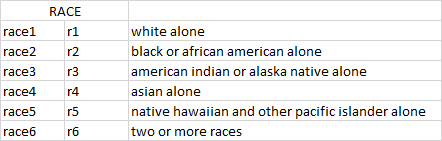

In [12]:
population_df.race = population_df.race.replace([1,2,3,4,5,6], ["r1","r2","r3","r4","r5","r6"])
population_df.head()

,sumlev,region,division,state,name,sex,origin,race,age,census2010pop,...,popestimate2010,popestimate2011,popestimate2012,popestimate2013,popestimate2014,popestimate2015,popestimate2016,popestimate2017,popestimate2018,popestimate2019
0,40,3,6,1,Alabama,s1,0,r1,0,37991,...,37818,38678,37824,36812,37575,37698,37629,37526,36370,35594
1,40,3,6,1,Alabama,s1,0,r1,1,38150,...,38036,37719,38597,37854,36968,37882,37732,37904,37641,36679
2,40,3,6,1,Alabama,s1,0,r1,2,39738,...,39570,38202,37653,38528,37769,37123,38048,37975,38172,37904
3,40,3,6,1,Alabama,s1,0,r1,3,39827,...,39805,39690,38113,37716,38605,37896,37266,38170,38197,38510
4,40,3,6,1,Alabama,s1,0,r1,4,39353,...,39493,39872,39628,38122,37751,38625,37954,37322,38312,38476


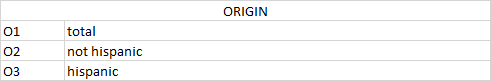

In [13]:
population_df.origin = population_df.origin.replace([0,1,2], ["o1","o2","o3"])
population_df.head()

,sumlev,region,division,state,name,sex,origin,race,age,census2010pop,...,popestimate2010,popestimate2011,popestimate2012,popestimate2013,popestimate2014,popestimate2015,popestimate2016,popestimate2017,popestimate2018,popestimate2019
0,40,3,6,1,Alabama,s1,o1,r1,0,37991,...,37818,38678,37824,36812,37575,37698,37629,37526,36370,35594
1,40,3,6,1,Alabama,s1,o1,r1,1,38150,...,38036,37719,38597,37854,36968,37882,37732,37904,37641,36679
2,40,3,6,1,Alabama,s1,o1,r1,2,39738,...,39570,38202,37653,38528,37769,37123,38048,37975,38172,37904
3,40,3,6,1,Alabama,s1,o1,r1,3,39827,...,39805,39690,38113,37716,38605,37896,37266,38170,38197,38510
4,40,3,6,1,Alabama,s1,o1,r1,4,39353,...,39493,39872,39628,38122,37751,38625,37954,37322,38312,38476



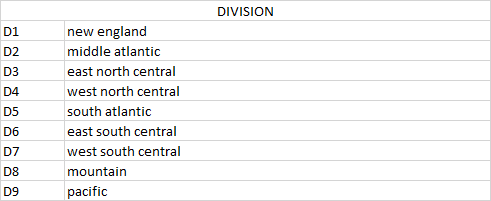

In [14]:
population_df.division = population_df.division.replace([1,2,3,4,5,6,7,8,9], ["d1","d2","d3","d4","d5","d6","d7","d8","d9"])
population_df.head()

,sumlev,region,division,state,name,sex,origin,race,age,census2010pop,...,popestimate2010,popestimate2011,popestimate2012,popestimate2013,popestimate2014,popestimate2015,popestimate2016,popestimate2017,popestimate2018,popestimate2019
0,40,3,d6,1,Alabama,s1,o1,r1,0,37991,...,37818,38678,37824,36812,37575,37698,37629,37526,36370,35594
1,40,3,d6,1,Alabama,s1,o1,r1,1,38150,...,38036,37719,38597,37854,36968,37882,37732,37904,37641,36679
2,40,3,d6,1,Alabama,s1,o1,r1,2,39738,...,39570,38202,37653,38528,37769,37123,38048,37975,38172,37904
3,40,3,d6,1,Alabama,s1,o1,r1,3,39827,...,39805,39690,38113,37716,38605,37896,37266,38170,38197,38510
4,40,3,d6,1,Alabama,s1,o1,r1,4,39353,...,39493,39872,39628,38122,37751,38625,37954,37322,38312,38476
